In [1]:
import pandas as pd
import numpy as np
# import plotly.express as px
# import plotly

# import matplotlib.animation as ani
# import matplotlib.pyplot as plt
from data_processing import DataProcessing

In [2]:

def add_month_yr(x:pd.DataFrame, date_columns: set):
    '''
    Adds a month_yr column to a dataframe that has a column
    containing date strings.
    '''
    for column in date_columns:
        if column in x:
            # print(pd.to_datetime(x[column]))
            # print(x[column])
            # x['datetime']=pd.to_datetime(x[column])
            x['month-yr']=pd.to_datetime(x[column]).dt.strftime('%b-%Y')
            return x
    raise TypeError

def fix_categorical(x):
    '''Changes 'month-yr' column to CategoricalDtype'''
    assert isinstance(x,pd.DataFrame)
    dates=pd.DataFrame(x['month-yr'])
    dates['Timestamp']=pd.to_datetime(x['month-yr'])
    dates=dates.sort_values(by=['Timestamp'])
    sorted=[]
    [sorted.append(x) for x in dates['month-yr'] if x not in sorted]
    t=pd.CategoricalDtype(categories=sorted,ordered=True)
    x['month-yr'] = pd.Series(x['month-yr'],dtype=t)
    return x

In [3]:
data_dir = 'data'
processor = DataProcessing(data_dir)
data_dict=processor.process()


In [7]:

layoffs_df=add_month_yr(data_dict['data/layoffs'],{'date'})
layoffs_tot=fix_categorical(layoffs_df[layoffs_df['month-yr'].notna()].groupby(['month-yr','industry','country']).sum().reset_index()).set_index('month-yr').sort_index()
layoffs_tot=layoffs_tot[layoffs_tot.country=='United States']
layoffs_tot

/tmp/ipykernel_14309/3501220677.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  layoffs_tot=fix_categorical(layoffs_df[layoffs_df['month-yr'].notna()].groupby(['month-yr','industry','country']).sum().reset_index()).set_index('month-yr').sort_index()


,industry,country,total_laid_off,percentage_laid_off,funds_raised
month-yr,,,,,
Mar-2020,Education,United States,50.0,0.75,24.0
Mar-2020,Infrastructure,United States,50.0,0.10,552.0
Mar-2020,HR,United States,0.0,0.75,55.0
Mar-2020,Food,United States,341.0,1.37,242.0
Mar-2020,Fitness,United States,801.0,2.02,388.0
...,...,...,...,...,...
Feb-2023,Healthcare,United States,672.0,2.52,2880.0
Feb-2023,Marketing,United States,689.0,0.42,2023.0
Feb-2023,Logistics,United States,0.0,0.00,1100.0


<AxesSubplot: xlabel='month-yr'>

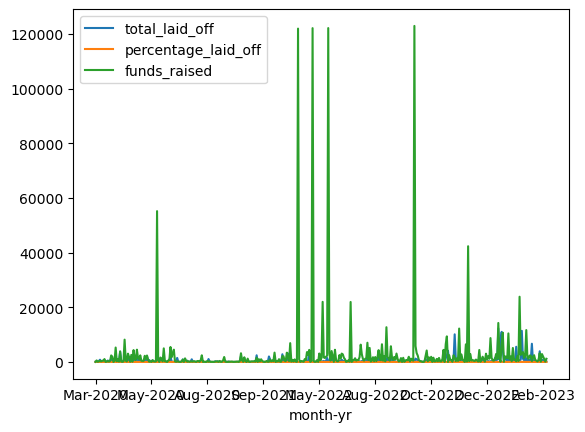

In [8]:
layoffs_tot.plot()